# Tareas: Diplomado de Técnicas Estadísticas y Minería de Datos, Módulo 2.

## Introducción

El presente cuaderno reúne todas las tareas realizadas durante el **Segundo Módulo del Diplomado en Técnicas Estadísticas y Minería de Datos**, cuyo enfoque principal fue el **desarrollo de bases sólidas en probabilidad y estadística** aplicadas al análisis de datos.

En este módulo se abordaron tres temas fundamentales:

1. **Espacio de probabilidad**  
   Se estudió cómo definir un experimento aleatorio, sus posibles resultados y la asignación de probabilidades a los eventos. Este concepto es la base para cualquier análisis estadístico y permite modelar la incertidumbre de manera rigurosa.

2. **Variables aleatorias**  
   Se trabajó con variables discretas y continuas, su función de probabilidad/densidad, $\mathbb{E}[X]$, $\mathrm{Var}(X)$ y otras medidas importantes para describir fenómenos aleatorios y cuantificar el riesgo o la variabilidad de datos.

3. **Estadística inferencial**  
   Se revisaron técnicas para **estimar parámetros poblacionales** y **comprobar hipótesis** a partir de muestras. Este bloque fue clave para comprender cómo generalizar resultados y tomar decisiones basadas en datos con un nivel controlado de confianza.

El objetivo de este notebook es **integrar todas las tareas y ejercicios resueltos**, sirviendo como evidencia de aprendizaje y como una referencia práctica para aplicar estos conceptos en futuros análisis de datos y problemas reales.


## Ejercicio de Clase 30 de Agosto

In [1]:
# Vamos a crear el espacio muestral
# Importamos el modulo
import itertools
from itertools import product

In [2]:
Omega = set(product({"A","S"}, repeat=3))
# product -> genera todas las tuplas de longitud 3
# set -> lo convierte en conjunto
Omega

{('A', 'A', 'A'),
 ('A', 'A', 'S'),
 ('A', 'S', 'A'),
 ('A', 'S', 'S'),
 ('S', 'A', 'A'),
 ('S', 'A', 'S'),
 ('S', 'S', 'A'),
 ('S', 'S', 'S')}

**Ejercicio** Calcular las probabilidades faltantes
- $S$: todos los resultados son soles
- $E$: por lo menos un resultado es sol


**Solución** Para $S$, vamos a descomponer al conjunto de la siguiente manera: $S = S_1 \cap S_2 \cap S_3$ donde $S_{i}:$ cae sol en el i-esimo coordenada.

In [3]:
# Vamos a crear el evento S1
S_1 = {om for om in Omega if om[0]=="S"}
S_1

{('S', 'A', 'A'), ('S', 'A', 'S'), ('S', 'S', 'A'), ('S', 'S', 'S')}

In [4]:
# Vamos a crear el evento S2
S_2 = {om for om in Omega if om[1]=="S"}
S_2

{('A', 'S', 'A'), ('A', 'S', 'S'), ('S', 'S', 'A'), ('S', 'S', 'S')}

In [5]:
# Vamos a crear el evento S3
S_3 = {om for om in Omega if om[2]=="S"}
S_3

{('A', 'A', 'S'), ('A', 'S', 'S'), ('S', 'A', 'S'), ('S', 'S', 'S')}

In [6]:
# Vamos a crear el evento A
S = S_1.intersection(S_2.intersection(S_3))
S

{('S', 'S', 'S')}

In [7]:
card_S=len(S)

In [8]:
# Calculamos la probabilidad
P_S = card_S / len(Omega)
print(f"La probabilidad de que todos los resultados sean soles es {P_S}")

La probabilidad de que todos los resultados sean soles es 0.125


 **Solución** Para $E$, vamos a descomponer al conjunto de la siguiente manera: $E = S_1 \cup S_2 \cup S_3$ donde $S_{i}:$ cae sol en el i-esimo coordenada.

In [10]:
# Aprovechando que ya se tienen definidos los conjuntos S_i solo resta realizar la union
E = S_1.union(S_2.union(S_3))
E

{('A', 'A', 'S'),
 ('A', 'S', 'A'),
 ('A', 'S', 'S'),
 ('S', 'A', 'A'),
 ('S', 'A', 'S'),
 ('S', 'S', 'A'),
 ('S', 'S', 'S')}

In [11]:
card_E=len(E)

In [12]:
# Calculamos la probabilidad
P_E = card_E / len(Omega)
print(f"La probabilidad de que por lo menos un resultado sea sol es {P_E}")

La probabilidad de que por lo menos un resultado sea sol es 0.875


## Actividad del sábado 6 de septiembre

In [13]:
import numpy as np
import numpy.random as npr # para generar numeros aleatorios

import matplotlib.pyplot as plt # para crear gráficos
import random # para generar numeros aleatorios (módulo estándar de Python)

import scipy.stats as sps # para distribuciones discretas y continuas, pruebas estadísticas
#from scipy.stats import randint # para generar números enteros aleatorios (uniforme discreta)

**Ejercicio 1**

Decimos que una variable aleatoria $X$ tiene distribución **uniforme discreta** en el conjunto $\{x_1, x_2, \dots, x_n\}$ si su función de densidad está dada por
$$f_{X}(x) = \begin{cases} \frac{1}{n}, \quad \text{si } x\in \{x_1, x_2, \dots, x_n\} \\ 0, \quad \text{e.o.c} \end{cases}$$

Se llama *uniforme* porque cada uno de sus posibles resultados de $X$ tienen la misma probabilidad.

**Notación:** $X \sim Unif(x_1, x_2, \dots, x_n)$.

La esperanza y la varianza de $X$ están dadas por:

$$\mathbb{E}(X) = \sum_{x}xf_{X}(x) = \frac{x_n + x_1}{2}$$
y
$$\text{Var}(X) = \mathbb{E}[(X-\mathbb{E}(x))^2] = \frac{(x_n - x_1 + 1)^2 -1}{12}$$



$\color{purple}{\text{Solución}}$

PD. Sea $X \sim Unif(x_1, x_2, \dots, x_n)$ demostrar que:
- $\mathbb{E}(X) =  \frac{x_n + x_1}{2}$
- $\text{Var}(X) =  \frac{(x_n - x_1 + 1)^2 -1}{12}$

Demostración
- $\mathbb{E}(X) = \sum_{x}xf_{X}(x) =\sum_{x=x_1}^{x_n}x\frac{1}{n} =\frac{1}{n}\sum_{x=x_1}^{x_n}x =\frac{1}{n}\sum_{x=x_1}^{x_n}x =\frac{1}{n}(\sum_{x=0}^{n-1}x_1+x)=\frac{1}{n}(n\cdot x_1+\sum_{x=1}^{n-1}x) $

$//\text{La formula de la suma de los primeros n números dada por gauss está dada por} \sum_{x=1}^{m}=\frac{m(m+1)}{2}//$

Para este caso m=n-1

$\begin{aligned}
\Rightarrow \mathbb{E}(X)= & \frac{1}{n}(n\cdot x_1+\left(\frac{(n-1)((n-1)+1)}{2}\right))=\frac{1}{n}(n\cdot x_1+\left(\frac{(n-1)(n)}{2}\right))\\
& =\frac{1}{n}(n)(x_1+\left(\frac{(n-1)}{2}\right))=\frac{2x_1}{2}+\left(\frac{(n-1)}{2}\right)=\left(\frac{2x_1+(n-1)}{2}\right)=\left(\frac{2x_1+(n-1)}{2}\right)\\
& =\left(\frac{(x_1+(n-1))+x_1}{2}\right)= \frac{x_n + x_1}{2}
& \blacksquare
\end{aligned}
$


- $\text{Var}(X) = \mathbb{E}[(X-\mathbb{E}(x))^2] = \frac{(x_n - x_1 + 1)^2 -1}{12}$


$\mathbb{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2 $

Por el inciso anterior sabemos que $\mathbb{E}(X) =  \frac{x_n + x_1}{2}$

$\mathbb{Var}(X) =\sum_{x}x^2f_{X}(x)- \left(\frac{x_1+x_n}{2}\right)^2=\left(\frac{1}{n}\sum_{x=x_1}^{x_n} x^2\right) - \left(\frac{x_1+x_n}{2}\right)^2,\quad .$

$//\text{ De manera similar usaremos la siguiente fórmula qu es la suma de los primeros n números al cuadrado} \sum_{k=1}^{n} k^2 = \frac{n(n+1)(2n+1)}{6}// $

Primero podemos reexpresar la serie de los términos desde $x_1$ hasta $x_n$ restando a la serie que va desde $1$ hasta $x_n$ menos la serie que va
desde 1 hasta $x_n+1$ y queda de la siguiente manera usando la fórmula propuesta anteriormente\
$\Rightarrow \sum_{x=x_1}^{x_n} x^2 = \sum_{k=1}^{x_n} k^2 - \sum_{k=1}^{x_1-1} k^2
 = \frac{x_n(x_n+1)(2x_n+1)}{6} - \frac{(x_1-1)x_1(2x_1-1)}{6}$

$ \Rightarrow \mathbb{E}[X^2] = \frac{1}{n}\left[\frac{x_n(x_n+1)(2x_n+1)}{6} - \frac{(x_1-1)x_1(2x_1-1)}{6}\right].$

$\therefore \mathrm{Var}(X) = \frac{1}{n}\left[\frac{x_n(x_n+1)(2x_n+1)}{6} - \frac{(x_1-1)x_1(2x_1-1)}{6}\right] - \left(\frac{x_1+x_n}{2}\right)^2 = \frac{(x_n
- x_1 + 1)^2 - 1}{12}.$


**Ejercicio 2: Calcular su Esperanza y su Varianza**

$\color{purple}{\text{Solución}}$
Con el resultado del Ejercicio 1 se puede aplicar a este caso
La esperanza y la varianza de $X$ están dadas por:

$$\mathbb{E}(X) =\frac{x_n + x_1}{2}$$
y
$$\text{Var}(X) =\frac{(x_n - x_1 + 1)^2 -1}{12}$$

Para este caso $x_1=1$ y $x_n=100$

$
\therefore \mathbb{E}[X] = \frac{1+100}{2} = 50.5
$

y

$
\mathrm{Var}(X) = \frac{(100-1+1)^2 - 1}{12} = \frac{100^2-1}{12} = \frac{9999}{12} \approx 833.25
$

In [14]:
import numpy as np
X = np.arange(1, 101)
p = np.ones(100) / 100  # probabilidades uniformes

# esperanza
E_X = np.sum(X * p)

# varianza
Var_X = np.sum((X - E_X)**2 * p)

print(f"E[X] = {E_X}")
print(f"Var[X] = {Var_X}")

E[X] = 50.5
Var[X] = 833.2500000000001


**Ejercicio 3**

Es una distribución de probabilidad discreta que sirve para calcular la probabilidad de que ocurra un determinado número de eventos raros durante un intervalo dado (puede ser tiempo, lingitud, área, volumén, etc).

Esta v.a. tomavalores sobre el conjunto $\{0,1,2,...\}$ y tiene un parámetro $\lambda>0$, el cual representa el número de veces que se **espera** que ocurra un evento durante un intervalo dado.

Su función de densidad, está dado como sigue:
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} e^{-\lambda}\frac{\lambda^x}{x!}, \quad \text{si } x\in \{0,1,...\} \\
0, \quad \text{e.o.c} \end{cases}$$

**Notación:** $X\sim \text{Poi}(\lambda)$.

Notemos que $\mathbb{E}[X]=\lambda$ y que $\text{Var}(X)=\lambda$.

**Ejemplo** Supongamos que el número de accidentes que ocurre en un punto en un día tiene distribución Poisson con parámetro $\lambda=2$,
- ¿cuál es la probabilidad de que en un día ocurran más de dos accidentes?
  $$ \begin{align*} \mathbb{P}(X>2) &= 1- \mathbb{P}(X\le 2) \\
    &= 1- [\mathbb{P}(X=0) + \mathbb{P}(X=1) + \mathbb{P}(X=2)] \\
    &= 1- \left[ e^{-2}\frac{2^0}{0!} + e^{-2}\frac{2^1}{1!} + e^{-2}\frac{2^2}{2!} \right] \\
    &= 1 - e^{-2}[1+2+2] = 1-5e^{-2} = 0.3233
    \end{align*} $$
- ¿cuál es la probabilidad de que ocurran más de dos accidentes sabiendo que por lo menos ocurre uno?
  $$ \begin{align*} \mathbb{P}(X>2 \mid X \ge 1) &= \frac{\mathbb{P}(\{X>2\} \cap \{X \ge 1\} )}{\mathbb{P}\{X \ge 1)\}} \\
       &= \frac{\mathbb{P}(\{X>2\})}{\mathbb{P}\{X \ge 1)\}} \\
       & = \frac{.3233}{1-\mathbb{P}(X<1)} = \frac{0.3233}{1-e^{-2}} = \frac{0.3233}{0.8646} = 0.3739
       \end{align*} $$

$\color{purple}{\text{Ejercicio 3.}}$ Usando el atributo `.cdf` [Poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) calcula las probabilidades anteriores. Y también graficar la función de densidad.

$\color{purple}{\text{Solución}}$

P(X > 2) = 0.3233
P(X > 2 | X ≥ 1) = 0.3739


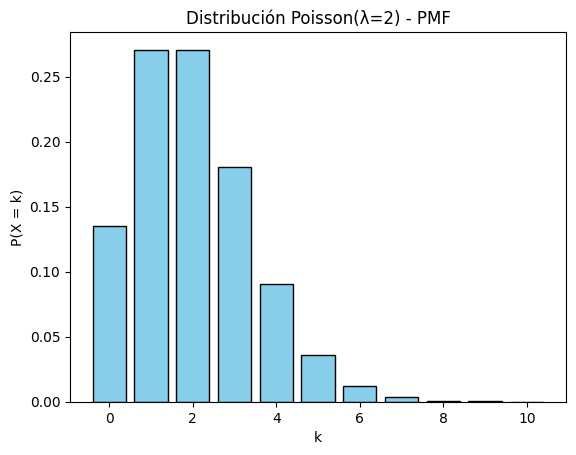

In [15]:
from math import e
from scipy.stats import poisson

lam = 2
p_gt_2 = 1 - poisson.cdf(2, mu=lam)

#P(X > 2 | X ≥ 1) = P(X>2) / P(X≥1)
p_ge_1 = 1 - poisson.cdf(0, mu=lam)
p_gt_2_given_ge_1 = p_gt_2 / p_ge_1

print(f"P(X > 2) = {p_gt_2:.4f}")
print(f"P(X > 2 | X ≥ 1) = {p_gt_2_given_ge_1:.4f}")
k = np.arange(0, 11)
pmf_vals = poisson.pmf(k, mu=lam)

plt.bar(k, pmf_vals, color="skyblue", edgecolor="black")
plt.title("Distribución Poisson(λ=2) - PMF")
plt.xlabel("k")
plt.ylabel("P(X = k)")
plt.show()

## Ejercicio v.a. uniforme continua (miercoles 10 se septiembre)

$\color{red}{\text{Ejercicio 1.}}$ Un alumno se dirige a la biblioteca para solicitar el préstamo de un libro y decide que no puede esperar más de $10$ minutos en ser atendido. Supongamos que el bibliotecario tarda por lo menos $0.5$ minutos en atender a una persona, entonces es razonable proponer una distribución uniforme en el intervalo $[0.5,10]$ para modelar el comportamiento de la variable $X$ que es el tiempo en ser atendido (en  minutos).

- Da la función de densidad y gráfica.
- ¿Cuál es la probabilidad de que el tiempo en ser atendido sea mayor a $5$ minutos pero menor a $8$ minutos?
- ¿Cuál es la esperanza y varianza?
- Calcula la función de distribución y gráficala, y con ella calcula: $\mathbb{P}(2.51\le X \le 7.99)$.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [17]:
a,b=0.5,10
width = b - a
cons = 1 / width

def pdf(x):
  x = np.array(x)
  return np.where((x >= a) & (x <= b), cons, 0)

def cdf(x):
  x = np.array(x)
  return np.where(x < a, 0, np.where(x > b, 1, (x - a) / (width)))

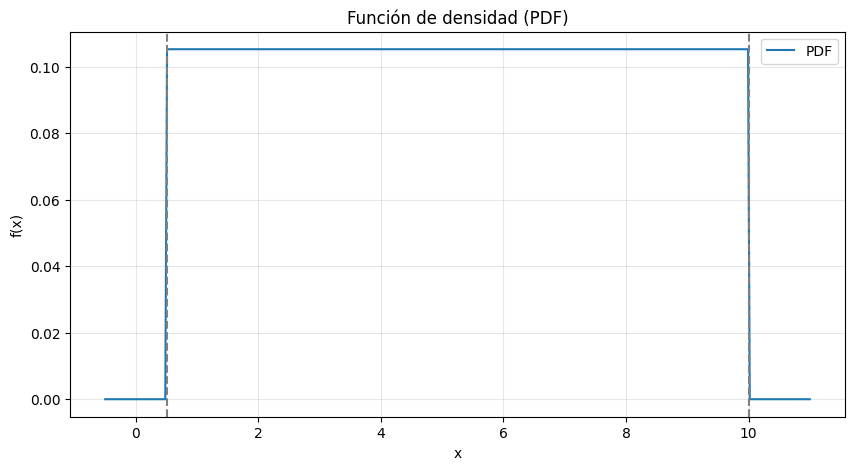

In [18]:
#Da la función de densidad y gráfica.

xs=np.linspace(a-1,b+1,400)
plt.figure(figsize=(10,5))
plt.plot(xs,pdf(xs),label="PDF")
plt.axvline(a, color='gray', linestyle='--')
plt.axvline(b, color='gray', linestyle='--')
plt.title("Función de densidad (PDF)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [19]:
#¿Cuál es la probabilidad de que el tiempo en ser atendido sea mayor a $5$ minutos pero menor a $8$ minutos?

p_5_8 = (8-5)/width

p_5_8

0.3157894736842105

In [20]:
#¿Cuál es la esperanza y varianza?

E = (a+b)/2
var = (width**2)/12

print(f"Esperanza: {E}")
print(f"Varianza: {var}")

Esperanza: 5.25
Varianza: 7.520833333333333


In [21]:
#Calcula la función de distribución y gráficala, y con ella calcula:  P(2.51≤X≤7.99) .

p_interval= cdf(7.99)-cdf(2.51)

p_interval

np.float64(0.576842105263158)

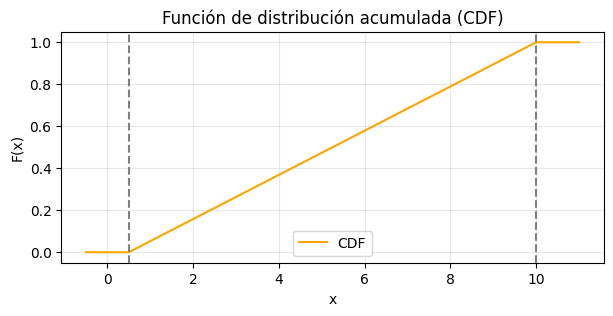

In [22]:
# Grafica CDF

plt.figure(figsize=(7,3))
plt.plot(xs, cdf(xs), label="CDF", color="orange")
plt.axvline(a, color='gray', linestyle='--')
plt.axvline(b, color='gray', linestyle='--')
plt.title("Función de distribución acumulada (CDF)")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

**Variable aleatoria uniforme sobre el intervalo $(a,b)$.**

Una variable aleatoria $X$ se dice que tiene distribución uniforme continua  en el intervalo $(a,b)$ con $a,b\in\mathbb{R}$, si su función de densidad esta dada por:
$$f_{X}(x)=\begin{cases}
	\frac{1}{b-a} &\quad \text{si } a< x < b\\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

**Notación.** $X\sim \text{Unif}(a,b)$ $\text{Unif}[a,b]$

**Obs:**
* La distribución uniforme continua en $(a,b)$ es simétrica.
* A los intervalos de la misma longitud contenidos en $(a,b)$ se les asigna la misma probabilidad. Esto se representa gráficamente con la probabilidad de que $X$ se encuentre en el intervalo $(s,t)$:


La función de distribución de $X\sim Unif((a,b))$ esta dada por:
$$F_{X}(x)=\begin{cases}
	 0 &\quad \text{si } x\le a \\
	\frac{x-a}{b-a} &\quad \text{si } a<x<b\\
	 1 &\quad \text{si } x\ge b  
\end{cases}$$

La esperanza de una variable aleatoria uniforme es la siguiente,
$$\begin{align*}
\mathbb{E}[X] &= \int_{a}^{b}xf_{X}(x)dx = \int_{a}^{b}x\frac{1}{b-a}dx = \frac{1}{b-a}\int_{a}^{b}xdx  = \frac{1}{b-a}\left[\frac{x^{2}}{2}\right]_{a}^{b} \\ &= \frac{1}{b-a}\left[\frac{b^{2}}{2}-\frac{a^{2}}{2}\right] =  \frac{b^{2}-a^{2}}{2(b-a)} = \frac{(b-a)(b+a)}{2(b-a)} = \frac{a+b}{2}.
\end{align*}$$

Para calcular la varianza, primero vamos a calcular el segundo momento
$$\begin{align*}
\mathbb{E}[X^{2}] &= \int_{a}^{b}x^{2}f_{X}(x)dx = \int_{a}^{b}x^{2}\frac{1}{b-a}dx = \frac{1}{b-a}\int_{a}^{b}x^{2}dx \\ &= \frac{1}{b-a}\left[\frac{x^{3}}{3}\right]_{a}^{b} = \frac{1}{b-a}\left[\frac{b^{3}}{3}-\frac{a^{3}}{3}\right] =  \frac{b^{3}-a^{3}}{3(b-a)}.
\end{align*}$$

Por lo que se tiene lo siguiente

$$Var(X) = \mathbb{E}[X^{2}]-(\mathbb{E}[X])^{2} =\frac{b^{3}-a^{3}}{3(b-a)}-\left(\frac{a+b}{2}\right)^{2} = \frac{(b-a)^{2}}{12}.$$

**Variable aleatoria uniforme sobre el intervalo $[0.5,10]$**

Sea $X \sim \text{Unif}(0.5,10)$.  
La función de densidad está dada por

$$
f_{X}(x)=
\begin{cases}
\dfrac{1}{10-0.5} = \dfrac{1}{9.5}, & 0.5 \le x \le 10,\\[6pt]
0, & \text{en otro caso.}
\end{cases}
$$

La función de distribución (CDF) es:

$$
F_{X}(x)=
\begin{cases}
0, & x < 0.5,\\[6pt]
\dfrac{x-0.5}{9.5}, & 0.5 \le x \le 10,\\[6pt]
1, & x > 10.
\end{cases}
$$



**Esperanza y Varianza**

La esperanza es:

$$
\mathbb{E}[X] = \frac{a+b}{2} = \frac{0.5 + 10}{2} = 5.25.
$$

El segundo momento es:

$$
\mathbb{E}[X^{2}] = \frac{b^{3}-a^{3}}{3(b-a)} =
\frac{10^{3}-0.5^{3}}{3(9.5)} = 34.0208.
$$

Por lo que la varianza es:

$$
\operatorname{Var}(X) = \mathbb{E}[X^{2}] - (\mathbb{E}[X])^{2}
= 34.0208 - (5.25)^{2}
= \frac{(10-0.5)^{2}}{12}
= 7.5208.
$$


**Probabilidades**

**Probabilidad de que $5<X<8$:**

$$
P(5<X<8)=\int_{5}^{8}\frac{1}{9.5}dx
=\frac{8-5}{9.5}
=\frac{3}{9.5}
=0.3158.
$$

**Probabilidad de que $2.51 \le X \le 7.99$:**

$$
P(2.51 \le X \le 7.99)=F(7.99)-F(2.51)
=\frac{7.99-0.5}{9.5}-\frac{2.51-0.5}{9.5}
=\frac{5.48}{9.5}
=0.5768.
$$


## Ejercicio de generar una v.a. Cauchy por medio de uniformes

$\mathbf{Ejemplo}$ (Variable aleatoria Cauchy) Simulemos la variable aleatoria de Cauchy de parámetro $1$ que tiene por función de densidad
$$f_{X}(x) = \frac{1}{\pi}\frac{1}{1+x^{2}}, \quad x\in\mathbb{R}$$

**Ejercicio:**
- Corroborar que la función así definida es una función de densidad de probabilidad
- Encontrar $F_X$
- Crear una gráfica en Python que muestre su forma
- Generar v.a. Cauchy a partir de una uniforme

Por el teorema anterior, para $u\in (0,1)$
$$u=\frac{1}{\pi}\arctan(x)+\frac{1}{2} \qquad \text{si y sólo si} \qquad x=\tan\left({\pi}\left(u-\frac{1}{2} \right) \right).$$

Para ser fdp se requiere:  
$$
f_X(x) \geq 0
$$

1.  
$$
\pi > 0 \quad \land \quad x^2 \geq 0 \;\;\Rightarrow\;\; f_X(x) > 0
$$

2.  
$$
\int_{-\infty}^{\infty} f_X(x)\, dx = 1
$$

Sea  
$$
I = \int_{-\infty}^{\infty} \frac{1}{\pi(1+x^2)}\, dx
$$

$$
I = \frac{1}{\pi} \left[ \arctan(x) \right]_{-\infty}^{+\infty}
$$

$$
I = \frac{1}{\pi} \Big( \arctan(+\infty) - \arctan(-\infty) \Big)
$$

$$
I = \frac{1}{\pi} \left( \frac{\pi}{2} - \left(-\frac{\pi}{2}\right) \right)
$$

$$
I = \frac{\pi}{\pi} = 1
$$

Por lo tanto:  
$$
f_X(x) \; \text{es una fdp.}
$$

Sea la función de distribución acumulada:

$$
F_X(x) = P(X \leq x) = \int_{-\infty}^x f(t)\, dt
$$

$$
F_X(x) = \int_{-\infty}^x \frac{1}{\pi(1+t^2)}\, dt
$$

$$
= \frac{1}{\pi} \left[ \arctan(t) \right]_{-\infty}^x
$$

$$
= \frac{1}{\pi} \left( \arctan(x) - \lim_{t \to -\infty} \arctan(t) \right)
$$

$$
= \frac{1}{\pi} \left( \arctan(x) - \left(-\frac{\pi}{2}\right) \right)
$$

$$
= \frac{1}{\pi} \left( \arctan(x) + \frac{\pi}{2} \right)
$$

Por lo tanto:

$$
F_X(x) = \frac{1}{\pi}\arctan(x) + \frac{1}{2}, \quad \forall x \in \mathbb{R}
$$

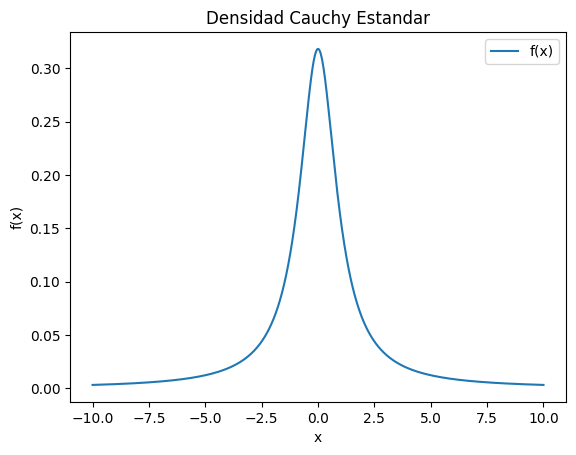

In [23]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 2000)
fx = 1 / (np.pi * (1 + x**2))

plt.figure()
plt.plot(x,fx,label='f(x)')
plt.title('Densidad Cauchy Estandar')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

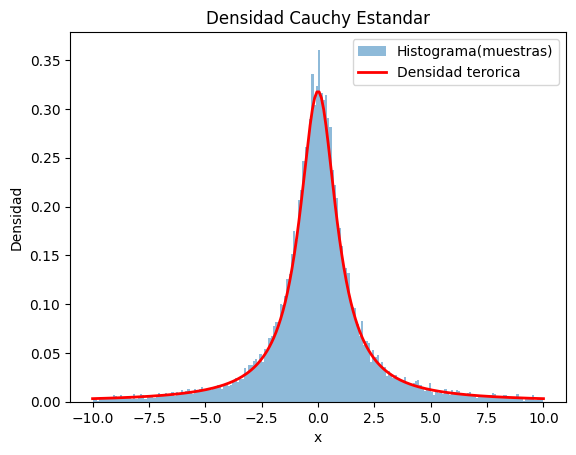

In [24]:
rng = np.random.default_rng(42)
n = 20000
u = rng.random(n)
x_samples = np.tan(np.pi * (u - 0.5))

x=np.linspace(-10,10,200)
fx=1/(np.pi*(1+x**2))

plt.figure()
plt.hist(x_samples,bins=200,range=(-10,10), density = True, alpha=0.5,label='Histograma(muestras)')
plt.plot(x,fx,'r',linewidth=2,label='Densidad terorica')
plt.title('Densidad Cauchy Estandar')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()

## Ejercicios EMV

**Ejercicio:** El tiempo de retardo para pacientes con enfermedad coronaria potencial se define como la duración entre el comienzo de un síntoma agudo cardiovascular y la llegada a la unidad de emergencia.

Se supone que el tiempo de retardo sigue una distribución exponencial con parámetro $\theta $.

Se registraron los tiempos de retardo (en minutos) en la clínica para los primeros 20 pacientes:

$$ 525, \ 719, \ 2880, \ 150, \ 30, \ 251, \ 45, \ 858, \ 15, \ 47, \ 90, \ 56, \ 68, \ 6, \ 189, \ 180, \ 60, \ 60, \ 294, \ 747 $$

- Encuentra un estimador por el **método de momentos** para la media de la distribución (exponencial).
  Rocordemos que si $X\sim Exp(\theta)$, entonces $\mathbb{E}[X]=\frac{1}{\theta}$
- (Python) Encuentra el valor del estimador con los datos dados.

**Estimador por el **Método de Momentos** para la media de una distribución exponencial**

Sea una variable aleatoria $(X)$ con distribución exponencial de parámetro $(\theta>0)$:

$$
f(x\mid \theta)=\theta e^{-\theta x}, \quad x\ge 0.
$$

La esperanza teórica es:

$$
\mathbb{E}[X] = \int_0^\infty x \,\theta e^{-\theta x}\,dx = \frac{1}{\theta}.
$$

El **primer momento muestral** para una muestra $(x_1,\ldots,x_n$) es:

$$
m_1 = \bar{X} = \frac{1}{n}\sum_{i=1}^n x_i.
$$

El método de momentos iguala momento teórico con muestral con $m_1=\mathbb{E}[X]$

$$
\bar{X} = \mathbb{E}[X] = \frac{1}{\theta}.
$$

Despejando el parámetro:

$$
{\hat{\theta}_{\mathrm{MM}} = \frac{1}{\bar{X}}}
$$

y, por lo tanto, un estimador para la **media** $(\mu=\mathbb{E}[X])$ es simplemente:

$$
{\hat{\mu}_{\mathrm{MM}} = \bar{X}.}
$$


In [25]:
import numpy as np

x = np.array([525, 719, 2880, 150, 30, 251, 45, 858, 15, 47,
              90, 56, 68, 6, 189, 180, 60, 60, 294, 747], dtype=float)

n = x.size
S = x.sum()
xbar = x.mean()
theta_hat = 1.0 / xbar

print(f"n = {n}")
print(f"Suma = {S:.0f}")
print(f"Media muestral (mu_hat_MM) = {xbar:.4f}")
print(f"theta_hat_MM (MLE también) = {theta_hat:.6f}")

n = 20
Suma = 7270
Media muestral (mu_hat_MM) = 363.5000
theta_hat_MM (MLE también) = 0.002751


**Ejercicio (Pyton)**. Suponga que la vida util de los focos de cierta marca, se modela mediante una distribución expoencial de parametro  θ  (desconocido). Probamos 5 focos y encontramos que tienen una vida útil de  2,3,1,3  y  5  años, respectivamente. ¿Cuál es el MLE para  θ ?

In [26]:
import numpy as np

x = np.array([2,3,1,3,5])
n = len(x)
theta_mle = n / x.sum()
theta_mle
miu=1.0/theta_mle
print(f"theta_mle = {theta_mle:.6f}")
print(f"miu = {miu:.6f}")

theta_mle = 0.357143
miu = 2.800000


## Ejercicios IC

**Ejercicio 1** En una encuesta de una Universidad, 225 estudiantes son seleccionados al azar de los que toman cálculo y se les pregunta si cálculo es su materia favorita. 100 estudiantes responden que el cálculo es su materia favorita. Proporcione un intervalo de confianza del 95 %  para la proporción de todos los estudiantes que toman cálculo y que la consideran su materia favorita.  

In [27]:
from math import sqrt
from scipy import stats

#Datos
n = 225           #tamaño de muestra
x = 100           #estudiantes que respondieron que cálculo es su favorita
phat = x / n      #proporción muestral

#Nivel de confianza
conf = 0.95
alpha = 1 - conf
z = stats.norm.ppf(1 - alpha/2)  #valor crítico z

#Error estándar y margen
SE = sqrt(phat*(1 - phat)/n)
LI = phat - z*SE
LS = phat + z*SE

print(f"p̂ = {phat:.4f}")
print(f"z = {z:.4f}")
print(f"SE = {SE:.4f}")
print(f"IC95%: ({LI:.4f}, {LS:.4f})")

p̂ = 0.4444
z = 1.9600
SE = 0.0331
IC95%: (0.3795, 0.5094)


**Conclusión ejercicio 1:**

La proporción muestral de estudiantes que consideran el cálculo como su materia favorita es:

$$
\hat{p} = \frac{100}{225} = 0.4444 \; (44.44\%).
$$

Con un nivel de confianza del **95 %**, el intervalo estimado para la proporción poblacional es:

$$
IC_{95\%} = (0.3795,\; 0.5094)
$$

Esto significa que, con un **95 % de confianza**, podemos afirmar que la verdadera proporción de todos los estudiantes que toman cálculo y lo consideran su materia favorita se encuentra entre **37.95 % y 50.94 %**.

En otras palabras, aunque en la muestra el \(44\%\) dijo que cálculo es su materia favorita, la proporción real de toda la población que toma cálculo podría estar entre aproximadamente **38 % y 51 %**.

El intervalo no es demasiado amplio, lo que indica que la muestra de \(n=225\) estudiantes proporciona una estimación razonablemente precisa de la proporción poblacional.

**Ejercicio 2** Los datos $1.2,\ 2.1,\ 2.3,\ 1.9,\ 3.0,\ 1.5,\ 2.8,\ 2.4,\ 1.7,\ 2.6,\ 2.0,\ 1.8,\ 3.1,\ 2.2,\ 2.5$ se toman a partir de una distribución normal $N(\mu,\sigma^2)$ con $\mu$ desconocida.

**a)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\mu$, dado que $\sigma =2$.

**b)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\mu$.

**c)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\sigma^2$.

In [28]:
import statistics as st
from math import sqrt
from scipy import stats

datos = [1.2,2.1,2.3,1.9,3.0,1.5,2.8,2.4,1.7,2.6,2.0,1.8,3.1,2.2,2.5]

n = len(datos)
xbar = st.mean(datos)
sigma = 2      # desviación poblacional conocida
conf = 0.90
alpha = 1 - conf
z = stats.norm.ppf(1 - alpha/2)

SE = sigma / sqrt(n)
LI = xbar - z*SE
LS = xbar + z*SE

print("Ejercicio 2(a) — IC90% para μ con σ=2")
print(f"Media muestral = {xbar:.4f}")
print(f"z = {z:.4f}")
print(f"SE = {SE:.4f}")
print(f"IC90%: ({LI:.4f}, {LS:.4f})")

Ejercicio 2(a) — IC90% para μ con σ=2
Media muestral = 2.2067
z = 1.6449
SE = 0.5164
IC90%: (1.3573, 3.0561)


In [29]:
s = st.pstdev(datos) * sqrt(n/(n-1))  # desviación muestral (ddof=1)
df = n - 1
t = stats.t.ppf(1 - alpha/2, df)

SE = s / sqrt(n)
LI = xbar - t*SE
LS = xbar + t*SE

print("Ejercicio 2(b) — IC90% para μ con σ desconocida (t)")
print(f"s = {s:.4f}")
print(f"t = {t:.4f}")
print(f"SE = {SE:.4f}")
print(f"IC90%: ({LI:.4f}, {LS:.4f})")


Ejercicio 2(b) — IC90% para μ con σ desconocida (t)
s = 0.5444
t = 1.7613
SE = 0.1406
IC90%: (1.9591, 2.4542)


In [30]:
S2 = s**2
chi2_inf = stats.chi2.ppf(alpha/2, df)
chi2_sup = stats.chi2.ppf(1 - alpha/2, df)

LI = df*S2/chi2_sup
LS = df*S2/chi2_inf

print("Ejercicio 2(c) — IC90% para σ²")
print(f"S² = {S2:.4f}")
print(f"χ²_inf = {chi2_inf:.4f}, χ²_sup = {chi2_sup:.4f}")
print(f"IC90%: ({LI:.4f}, {LS:.4f})")

Ejercicio 2(c) — IC90% para σ²
S² = 0.2964
χ²_inf = 6.5706, χ²_sup = 23.6848
IC90%: (0.1752, 0.6315)


**Conclusión ejercicio 2:**


Se tomaron los datos:

$$
1.2,\,2.1,\,2.3,\,1.9,\,3.0,\,1.5,\,2.8,\,2.4,\,1.7,\,2.6,\,2.0,\,1.8,\,3.1,\,2.2,\,2.5
$$

La media muestral resultó ser:

$$
\bar{x} = 2.2067
$$

y la desviación estándar muestral:

$$
s = 0.5444
$$



a) Intervalo de confianza del 90% para $\mu$ con $\sigma = 2$ conocida

$$
IC_{90\%} = (1.3573,\; 3.0561)
$$

b) Intervalo de confianza del 90% para $\mu$ con $\sigma$ desconocida (uso de t)

$$
IC_{90\%} = (1.9591,\; 2.4542)
$$

c) Intervalo de confianza del 90% para $\sigma^{2}$

$$
IC_{90\%} = (0.1752,\; 0.6315)
$$



**Interpretación:**  

- Cuando la desviación estándar poblacional es **conocida** y se usa la distribución normal, el intervalo (a) es **más amplio** porque se está usando $\sigma = 2$ que es mayor a la desviación muestral observada.  
- Cuando $\sigma$ es **desconocida** y usamos la distribución t (b), el intervalo se estrecha un poco porque la variabilidad muestral resultó menor ($s=0.54$).  
- Para la **varianza** (c), el intervalo muestra que la dispersión verdadera puede estar entre aproximadamente $0.18$ y $0.63$, reflejando la incertidumbre sobre la variabilidad de la población.

En general, los intervalos confirman que la media poblacional $\mu$ se estima alrededor de $2.21$ con un margen moderado, y que la varianza $\sigma^2$ podría variar pero permanece en valores relativamente pequeños, indicando poca dispersión en los datos.


**Ejercicio 4** En un estudio de préstamos a estudiantes, el Departamento de Educación informó que los beneficiarios del fondo Stafford Loan deberían un promedio de \$12,658 al recibirse (*USA Today*, 5 de abril de 1995). Suponga que este promedio de deuda se basa en una muestra de 480 préstamos a estudiantes y que la desviación estándar de la población de las deudas al recibirse es \$2,000.

**a)** Determina un estimado de confianza del **90%** del promedio poblacional de la deuda.

**b)** Determina un estimado de confianza del **95%** del promedio poblacional de la deuda.

**c)** Determina un estimado de confianza del **99%** del promedio poblacional de la deuda.

**d)** Describe lo que sucede con el **ancho del intervalo de confianza** a medida que se **aumenta el nivel de confianza**. ¿Parece razonable? Explica tu respuesta.

In [31]:
from math import sqrt
from scipy import stats

# Datos
xbar = 12658     # media muestral
sigma = 2000     # desviación estándar poblacional conocida
n = 480
SE = sigma / sqrt(n)

def imprimir_ic(conf):
    alpha = 1 - conf
    z = stats.norm.ppf(1 - alpha/2)
    LI = xbar - z*SE
    LS = xbar + z*SE
    print(f"Nivel de confianza: {int(conf*100)}%")
    print(f"  z = {z:.3f}")
    print(f"  Error estándar (σ/√n) = {SE:.3f}")
    print(f"  Intervalo de confianza: [{LI:,.2f} , {LS:,.2f}]")
    print(f"  Ancho del intervalo: {LS - LI:,.2f}\n")
    return LS - LI


ancho_90 = imprimir_ic(0.90)
ancho_95 = imprimir_ic(0.95)
ancho_99 = imprimir_ic(0.99)

Nivel de confianza: 90%
  z = 1.645
  Error estándar (σ/√n) = 91.287
  Intervalo de confianza: [12,507.85 , 12,808.15]
  Ancho del intervalo: 300.31

Nivel de confianza: 95%
  z = 1.960
  Error estándar (σ/√n) = 91.287
  Intervalo de confianza: [12,479.08 , 12,836.92]
  Ancho del intervalo: 357.84

Nivel de confianza: 99%
  z = 2.576
  Error estándar (σ/√n) = 91.287
  Intervalo de confianza: [12,422.86 , 12,893.14]
  Ancho del intervalo: 470.28



Respuesta inciso d)

d) Análisis del ancho de los intervalos

- Ancho 90 %: $12,808.15 - 12,507.85 = 300.31$
- Ancho 95 %: $12,836.92 - 12,479.08 = 357.84$
- Ancho 99 %: $12,893.14 - 12,422.86 = 470.28$

Se observa que **el ancho del intervalo aumenta conforme crece el nivel de confianza**:  
90 % < 95 % < 99 %.  

Esto es **razonable**, porque al exigir mayor certeza (por ejemplo, 99 % en lugar de 90 %), necesitamos abarcar un rango más amplio para asegurar que el verdadero promedio poblacional esté contenido dentro del intervalo.

**Conclusiones ejercicio 4:**
- **a) IC 90 %**  
  El intervalo $[12{,}507.85 ,\; 12{,}808.15]$ significa que, con un **90 % de confianza**, el **promedio real** de la deuda que deben los estudiantes al recibir el préstamo está entre **12,507.85 y 12,808.15 dólares**.  
  Es decir, si repitiéramos muchas veces el muestreo y el cálculo, el 90 % de esos intervalos contendrían el verdadero promedio poblacional.

- **b) IC 95 %**  
  El intervalo $[12{,}479.08 ,\; 12{,}836.92]$ indica que, con **95 % de confianza**, el promedio poblacional se encuentra entre **12,479.08 y 12,836.92 dólares**.  
  Al aumentar el nivel de confianza de 90 % a 95 %, el intervalo se hizo **más amplio** para asegurar mayor probabilidad de contener el verdadero promedio.

- **c) IC 99 %**  
  El intervalo $[12{,}422.86 ,\; 12{,}893.14]$ muestra que, con **99 % de confianza**, el promedio poblacional podría estar entre **12,422.86 y 12,893.14 dólares**.  
  Al exigir un nivel de confianza aún mayor, el intervalo se vuelve todavía **más ancho** para garantizar que el valor real esté incluido con más certeza.

- **d) Análisis del ancho de los intervalos**  
  El ancho crece al aumentar el nivel de confianza:  
  $300.31$ (90 %) < $357.84$ (95 %) < $470.28$ (99 %).  
  Esto es **razonable**, porque para estar más seguros de que el verdadero promedio está dentro del intervalo, necesitamos cubrir un rango más amplio. A mayor certeza, mayor margen de seguridad.
